# Pylops - Signal Processing on GPU with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-09-29 19:58:28--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-09-29 19:58:28--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.20M 13s
    50K .......... .......... .......... .......... ..........  0

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-1.6.1|   py36h7b6447c_0         886 KB
    libffi-3.3                 |       he6710b0_2          54 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    pycosat-0.6.3              |   py36h7b6447c_0         107 KB
    cryptography-3.1.1         |   py36h1ba5d50_0         612 KB
    requests-2.24.0            |             py_0          54 KB
    pip-20.2.2                 |           py36_0         2.0 MB
    pyopenssl-19.1.0           |             py_1          47 KB
    setuptools-49.6.0          |           py36_1         933 KB
    certifi-2020.6.20          |           py36_0  

conda-package-handli |  886 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
cryptography-3.1.1   |  612 KB | ########## | 100% 
requests-2.24.0      |   54 KB | ########## | 100% 
pip-20.2.2           |  2.0 MB | ########## | 100% 
pyopenssl-19.1.0     |   47 KB | ########## | 100% 
setuptools-49.6.0    |  933 KB | ########## | 100% 
certifi-2020.6.20    |  160 KB | ########## | 100% 
python-3.6.12        | 34.0 MB | ########## | 100% 
cffi-1.14.3          |  224 KB | ########## | 100% 
pycparser-2.20       |   94 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
chardet-3.0.4        |  197 KB | ########## | 100% 
readline-8.0         |  428 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
ncurses-6.2 

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.12 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h6957fcd_0         316 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.5                |   py36h9f0ad1d_1         3.0 MB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-7.8.0            

In [7]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 15 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-s9w6fnu1
  Created wheel for pylops: filename=pylops-1.10.1.dev49+g19ac849-py3-none-any.whl size=155159 sha256=c64eaf753eedd9973893e7264f489886fa751e2f389723f5d8d0c335e6e4a46a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b2f6owxk/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [8]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [9]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt

from scipy.sparse.linalg import inv, lsqr
from scipy.sparse import rand

from pylops.utils import dottest
from pylops.utils.wavelets import *
from pylops import LinearOperator
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.optimization.solver import cgls
from pylops.optimization.leastsquares import *
from pylops.optimization.sparsity import *

## FFT

Dot test passed, v^T(Opu)=-1.962971+13.380846i - u^T(Op^Tv)=-1.962971+13.380846i


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


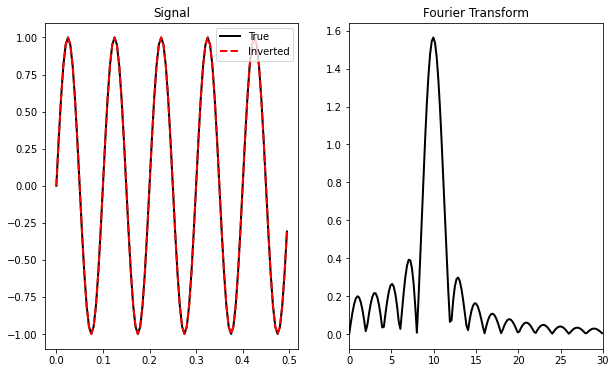

In [11]:
dt   = 0.005
nt   = 100
t    = cp.arange(nt)*dt
f0   = 10
nfft = 2**10
d  = cp.sin(2*np.pi*f0*t)

FFTop = FFT(dims=[nt], nfft=nfft, sampling=dt)
dottest(FFTop, nfft, nt, complexflag=3, verb=True, backend='cupy')

D    = FFTop*d
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = FFTop / D

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].plot(cp.asnumpy(t), cp.asnumpy(d),    'k',  lw=2, label='True')
axs[0].plot(cp.asnumpy(t), cp.asnumpy(dinv),'--r',lw=2, label='Inverted')
axs[0].legend()
axs[0].set_title('Signal')
axs[1].plot(cp.asnumpy(FFTop.f[:int(FFTop.nfft/2)]), 
            cp.asnumpy(np.abs(D[:int(FFTop.nfft/2)])),'k',lw=2)
axs[1].set_title('Fourier Transform')
axs[1].set_xlim([0,3*f0]);

Dot test passed, v^T(Opu)=-53.516463+13.412821i - u^T(Op^Tv)=-53.516463+13.412821i


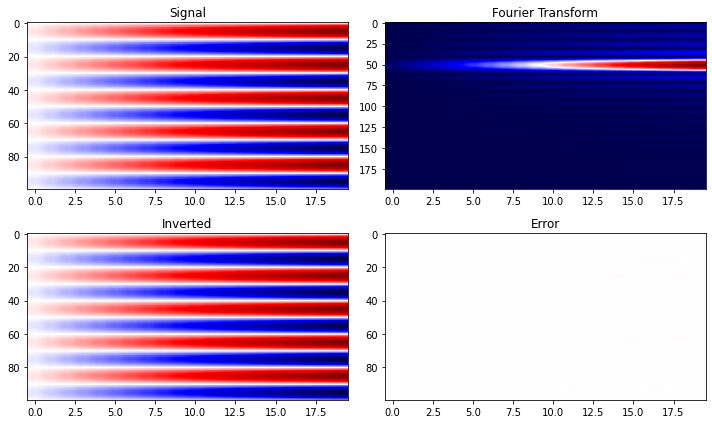

In [12]:
dt     = 0.005
nt,nx  = 100, 20
t      = cp.arange(nt)*dt
f0     = 10
nfft   = 2**10
d      = cp.outer(cp.sin(2*np.pi*f0*t), cp.arange(nx)+1)

FFTop = FFT(dims=[nt,nx], dir=0, nfft=nfft, sampling=dt)
dottest(FFTop, nfft*nx, nt*nx, complexflag=2, verb=True, backend='cupy')

D    = FFTop*d.flatten()
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = cp.real(FFTop / D).reshape(nt,nx)

fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0][0].imshow(cp.asnumpy(d), vmin=-20, vmax=20, cmap='seismic')
axs[0][0].set_title('Signal')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(np.abs(D.reshape(nfft,nx)[:200,:])), cmap='seismic')
axs[0][1].set_title('Fourier Transform')
axs[0][1].axis('tight')
axs[1][0].imshow(cp.asnumpy(dinv), vmin=-20, vmax=20, cmap='seismic')
axs[1][0].set_title('Inverted')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(d-dinv), vmin=-20, vmax=20, cmap='seismic')
axs[1][1].set_title('Error')
axs[1][1].axis('tight')
fig.tight_layout();

Dot test passed, v^T(Opu)=140.852835-95.559244i - u^T(Op^Tv)=140.852835-95.559244i


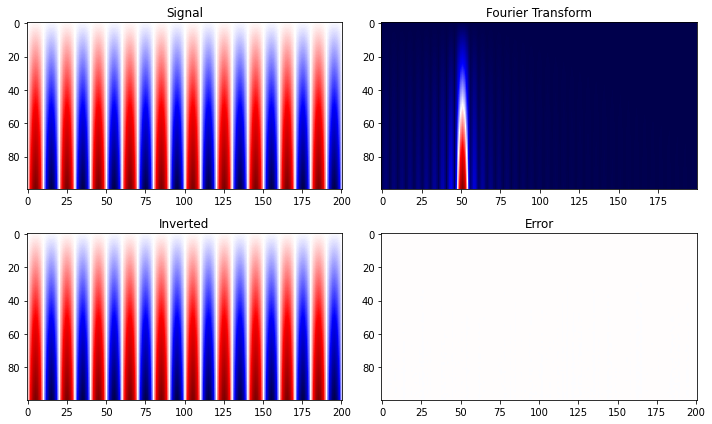

In [13]:
dx     = 0.005
nt,nx  = 100, 201
x      = cp.arange(nx)*dx
f0     = 10
nfft   = 2**10
d      = cp.outer(cp.arange(nt)+1, cp.sin(2*np.pi*f0*x))

FFTop = FFT(dims=[nt,nx], dir=1, nfft=nfft, sampling=dt)
dottest(FFTop, nt*nfft, nt*nx, complexflag=2, verb=True, backend='cupy')

D    = FFTop*d.flatten()
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = cp.real(FFTop / D).reshape(nt,nx)

fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0][0].imshow(cp.asnumpy(d), vmin=-100, vmax=100, cmap='seismic')
axs[0][0].set_title('Signal')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(np.abs(D.reshape(nt,nfft)[:,:200])), cmap='seismic')
axs[0][1].set_title('Fourier Transform')
axs[0][1].axis('tight')
axs[1][0].imshow(cp.asnumpy(dinv), vmin=-100, vmax=100, cmap='seismic')
axs[1][0].set_title('Inverted')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(d-dinv), vmin=-100, vmax=100, cmap='seismic')
axs[1][1].set_title('Error')
axs[1][1].axis('tight')
fig.tight_layout()

Dot test passed, v^T(Opu)=266.400806+321.881111i - u^T(Op^Tv)=266.400806+321.881111i


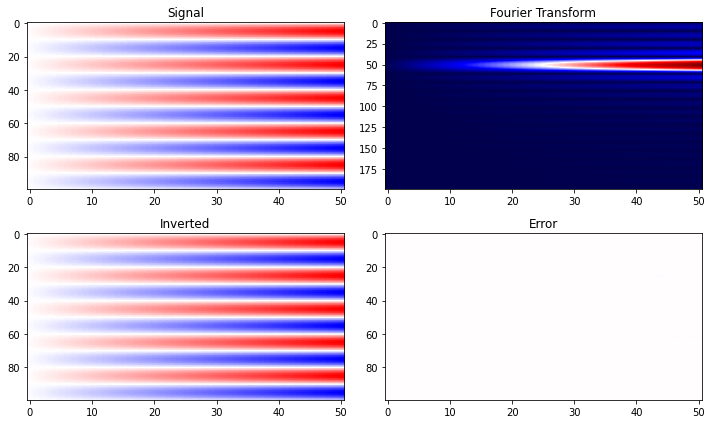

In [14]:
dt, dx, dy = 0.005, 5, 1
nt, nx, ny  = 100, 51, 6
t      = cp.arange(nt)*dt
f0     = 10
nfft   = 2**10
d      = cp.outer(cp.sin(2*np.pi*f0*t), cp.arange(nx)+1)
d      = cp.tile(d[:,:,np.newaxis], [1,1,ny])

FFTop = FFT(dims=[nt,nx,ny], dir=0, nfft=nfft, sampling=dt)
dottest(FFTop, nfft*nx*ny, nt*nx*ny, complexflag=2, verb=True, backend='cupy')

D    = FFTop*d.flatten()
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = cp.real(FFTop / D).reshape(nt,nx,ny)

fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0][0].imshow(cp.asnumpy(d[:,:,ny//2]), vmin=-100, vmax=100, cmap='seismic')
axs[0][0].set_title('Signal')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(np.abs(D.reshape(nfft,nx,ny)[:200,:,ny//2])), cmap='seismic')
axs[0][1].set_title('Fourier Transform')
axs[0][1].axis('tight')
axs[1][0].imshow(cp.asnumpy(dinv[:,:,ny//2]), vmin=-100, vmax=100, cmap='seismic')
axs[1][0].set_title('Inverted')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(d[:,:,ny//2]-dinv[:,:,ny//2]), vmin=-100, vmax=100, cmap='seismic')
axs[1][1].set_title('Error')
axs[1][1].axis('tight')
fig.tight_layout()

## FFT2D

Dot test passed, v^T(Opu)=-172.764644+33.307540i - u^T(Op^Tv)=-172.764644+33.307540i


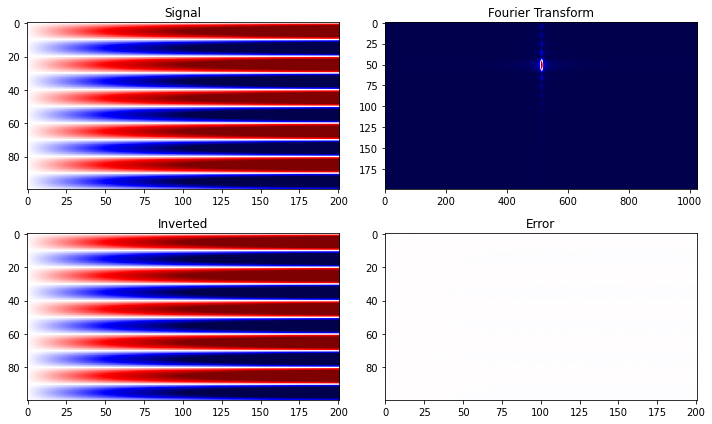

In [15]:
dt, dx = 0.005, 5
nt,nx  = 100, 201
t      = cp.arange(nt)*dt
x      = cp.arange(nx)*dx
f0     = 10
nfft   = 2**10
d      = cp.outer(cp.sin(2*np.pi*f0*t), cp.arange(nx)+1)

FFTop = FFT2D(dims=[nt,nx], nffts=[nfft,nfft], sampling=[dt,dx])
dottest(FFTop, nfft*nfft, nt*nx, complexflag=2, verb=True, backend='cupy')

D    = FFTop*d.flatten()
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = cp.real(FFTop / D).reshape(nt,nx)

fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0][0].imshow(cp.asnumpy(d), vmin=-100, vmax=100, cmap='seismic')
axs[0][0].set_title('Signal')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(np.abs(np.fft.fftshift(D.reshape(nfft,nfft),axes=1)[:200,:])), cmap='seismic')
axs[0][1].set_title('Fourier Transform')
axs[0][1].axis('tight')
axs[1][0].imshow(cp.asnumpy(dinv), vmin=-100, vmax=100, cmap='seismic')
axs[1][0].set_title('Inverted')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(d-dinv), vmin=-100, vmax=100, cmap='seismic')
axs[1][1].set_title('Error')
axs[1][1].axis('tight')
fig.tight_layout()

In [16]:
dt, dx, dy = 0.005, 5, 1
nt, nx, ny  = 100, 51, 31
t      = cp.arange(nt)*dt
f0     = 10
nfft   = 2**8
d      = cp.outer(cp.sin(2*np.pi*f0*t), cp.arange(nx)+1)
d      = cp.tile(d[:,:,np.newaxis], [1,1,ny])

FFTop = FFT2D(dims=[nt,nx,ny], nffts=[nfft,nfft], sampling=[dt,dx])
dottest(FFTop, nfft*nfft*ny, nt*nx*ny, complexflag=2, verb=True, backend='cupy')

D    = FFTop*d.flatten()
#dinv = FFTop.H*D # adjoint is inverse for fft
dinv = cp.real(FFTop / D).reshape(nt,nx,ny)

print(np.linalg.norm(d-dinv))

Dot test passed, v^T(Opu)=-372.010940-618.097864i - u^T(Op^Tv)=-372.010940-618.097864i
1.8486513514518257e-12


## 1D Convolution

In [17]:
nx = 10
x  = np.zeros(nx)
x[3]=1
offset=4
h = cp.arange(-3, 3)
print(h)
Cop = Convolve1D(nx, h=h, offset=offset, 
                 dtype='float32', method='direct')
dottest(Cop, nx, nx, verb=True, backend='cupy')

y    = Cop*x
xadj = Cop.H*x

print('x= ',x)
print('y= ',y)
print('xadj= ',xadj)

[-3 -2 -1  0  1  2]
Dot test passed, v^T(Opu)=17.438345 - u^T(Op^Tv)=17.438345
x=  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y=  [-2. -1.  0.  1.  2.  0.  0.  0.  0.  0.]
xadj=  [ 0.  0.  2.  1.  0. -1. -2. -3.  0.  0.]


Dot test passed, v^T(Opu)=-20.375669 - u^T(Op^Tv)=-20.375669


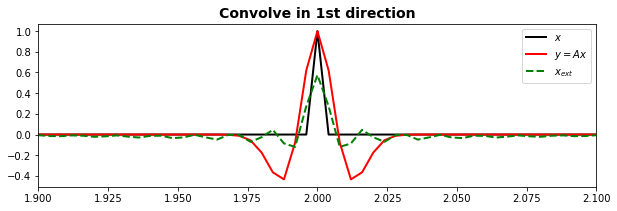

In [41]:
nt = 1001
dt = 0.004
t  = np.arange(nt)*dt
x  = np.zeros(nt)
x[int(nt/2)] = 1

h, th, hcenter = ricker(t[:101], f0=30)
    
Cop = Convolve1D(nt, h=cp.array(h), offset=hcenter, dtype='float32')
dottest(Cop, nt, nt, verb=True, backend='cupy')
y    = Cop*x
xcgls = cgls(Cop, y, x0=cp.zeros(nt), damp=0, niter=1000, show=0)[0]

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(cp.asnumpy(t), cp.asnumpy(x), 'k', lw=2, label=r'$x$')
ax.plot(cp.asnumpy(t), cp.asnumpy(y), 'r', lw=2, label=r'$y=Ax$')
ax.plot(cp.asnumpy(t), cp.asnumpy(xcgls), '--g', lw=2, label=r'$x_{ext}$')
ax.set_title('Convolve in 1st direction', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xlim(1.9,2.1);

Dot test passed, v^T(Opu)=-66.195571 - u^T(Op^Tv)=-66.195571


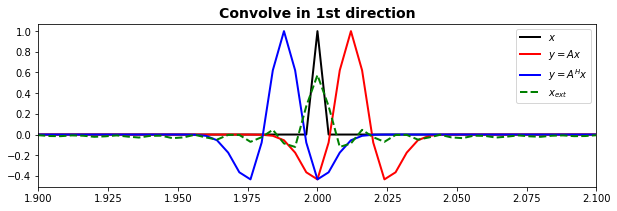

In [45]:
nt = 1001
dt = 0.004
t  = cp.arange(nt)*dt
x  = cp.zeros(nt)
x[int(nt/2)] = 1

h, th, hcenter = ricker(t[:101], f0=30)

Cop = Convolve1D(nt, h=h, offset=hcenter-3, dtype='float32')
dottest(Cop, nt, nt, verb=True, backend='cupy')

y    = Cop*x
y1   = Cop.H*x
xcgls = cgls(Cop, y, x0=cp.zeros(nt), damp=0, niter=1000, show=0)[0]

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(cp.asnumpy(t), cp.asnumpy(x), 'k', lw=2, label=r'$x$')
ax.plot(cp.asnumpy(t), cp.asnumpy(y), 'r', lw=2, label=r'$y=Ax$')
ax.plot(cp.asnumpy(t), cp.asnumpy(y1), 'b', lw=2, label=r'$y=A^Hx$')
ax.plot(cp.asnumpy(t), cp.asnumpy(xcgls), '--g', lw=2, label=r'$x_{ext}$')
ax.set_title('Convolve in 1st direction', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xlim(1.9,2.1);

In [43]:
from pylops.optimization.sparsity import _softthreshold
from pylops.utils.backend import get_array_module


def ISTA(Op, data, niter, eps=0.1, alpha=None, eigsiter=None, eigstol=0,
         tol=1e-10, monitorres=False, returninfo=False, show=False,
         threshkind='soft', perc=None, callback=None):
    r"""Iterative Shrinkage-Thresholding Algorithm (ISTA).

    Solve an optimization problem with :math:`Lp, \quad p=0, 1/2, 1`
    regularization, given the operator ``Op`` and data ``y``. The operator
    can be real or complex, and should ideally be either square :math:`N=M`
    or underdetermined :math:`N<M`.

    Parameters
    ----------
    Op : :obj:`pylops.LinearOperator`
        Operator to invert
    data : :obj:`numpy.ndarray`
        Data
    niter : :obj:`int`
        Number of iterations
    eps : :obj:`float`, optional
        Sparsity damping
    alpha : :obj:`float`, optional
        Step size (:math:`\alpha \le 1/\lambda_{max}(\mathbf{Op}^H\mathbf{Op})`
        guarantees convergence. If ``None``, the maximum eigenvalue is
        estimated and the optimal step size is chosen. If provided, the
        condition will not be checked internally).
    eigsiter : :obj:`float`, optional
        Number of iterations for eigenvalue estimation if ``alpha=None``
    eigstol : :obj:`float`, optional
        Tolerance for eigenvalue estimation if ``alpha=None``
    tol : :obj:`float`, optional
        Tolerance. Stop iterations if difference between inverted model
        at subsequent iterations is smaller than ``tol``
    monitorres : :obj:`bool`, optional
        Monitor that residual is decreasing
    returninfo : :obj:`bool`, optional
        Return info of CG solver
    show : :obj:`bool`, optional
        Display iterations log
    threshkind : :obj:`str`, optional
        Kind of thresholding ('hard', 'soft', 'half', 'hard-percentile',
        'soft-percentile', or 'half-percentile' - 'soft' used as default)
    perc : :obj:`float`, optional
        Percentile, as percentage of values to be kept by thresholding (to be
        provided when thresholding is soft-percentile or half-percentile)
    callback : :obj:`callable`, optional
        Function with signature (``callback(x)``) to call after each iteration
        where ``x`` is the current model vector

    Returns
    -------
    xinv : :obj:`numpy.ndarray`
        Inverted model
    niter : :obj:`int`
        Number of effective iterations
    cost : :obj:`numpy.ndarray`, optional
        History of cost function

    Raises
    ------
    NotImplementedError
        If ``threshkind`` is different from hard, soft, half, soft-percentile,
        or half-percentile
    ValueError
        If ``perc=None`` when ``threshkind`` is soft-percentile or
        half-percentile
    ValueError
        If ``monitorres=True`` and residual increases

    See Also
    --------
    OMP: Orthogonal Matching Pursuit (OMP).
    FISTA: Fast Iterative Shrinkage-Thresholding Algorithm (FISTA).
    SPGL1: Spectral Projected-Gradient for L1 norm (SPGL1).
    SplitBregman: Split Bregman for mixed L2-L1 norms.

    Notes
    -----
    Solves the following optimization problem for the operator
    :math:`\mathbf{Op}` and the data :math:`\mathbf{d}`:

    .. math::
        J = ||\mathbf{d} - \mathbf{Op} \mathbf{x}||_2^2 +
            \epsilon ||\mathbf{x}||_p

    using the Iterative Shrinkage-Thresholding Algorithms (ISTA) [1]_, where
    :math:`p=0, 1, 1/2`. This is a very simple iterative algorithm which
    applies the following step:

    .. math::
        \mathbf{x}^{(i+1)} = T_{(\epsilon \alpha /2, p)} (\mathbf{x}^{(i)} +
        \alpha \mathbf{Op}^H (\mathbf{d} - \mathbf{Op} \mathbf{x}^{(i)}))

    where :math:`\epsilon \alpha /2` is the threshold and :math:`T_{(\tau, p)}`
    is the thresholding rule. The most common variant of ISTA uses the
    so-called soft-thresholding rule :math:`T(\tau, p=1)`. Alternatively an
    hard-thresholding rule is used in the case of `p=0` or a half-thresholding
    rule is used in the case of `p=1/2`. Finally, percentile bases thresholds
    are also implemented: the damping factor is not used anymore an the
    threshold changes at every iteration based on the computed percentile.

    .. [1] Daubechies, I., Defrise, M., and De Mol, C., “An iterative
       thresholding algorithm for linear inverse problems with a sparsity
       constraint”, Communications on pure and applied mathematics, vol. 57,
       pp. 1413-1457. 2004.

    """
    if not threshkind in ['hard', 'soft', 'half', 'hard-percentile',
                          'soft-percentile', 'half-percentile']:
        raise NotImplementedError('threshkind should be hard, soft, half,'
                                  'hard-percentile, soft-percentile, '
                                  'or half-percentile')
    if threshkind in ['hard-percentile',
                      'soft-percentile',
                      'half-percentile'] and perc is None:
        raise ValueError('Provide a percentile when choosing hard-percentile,'
                         'soft-percentile, or half-percentile thresholding')

    # choose thresholding function
    if threshkind == 'soft':
        threshf = _softthreshold
    elif threshkind == 'hard':
        threshf = _hardthreshold
    elif threshkind == 'half':
        threshf = _halfthreshold
    elif threshkind == 'hard-percentile':
        threshf = _hardthreshold_percentile
    elif threshkind == 'soft-percentile':
        threshf = _softthreshold_percentile
    else:
        threshf = _halfthreshold_percentile

    ncp = get_array_module(data)

    if show:
        tstart = time.time()
        print('ISTA optimization (%s thresholding)\n'
              '-----------------------------------------------------------\n'
              'The Operator Op has %d rows and %d cols\n'
              'eps = %10e\ttol = %10e\tniter = %d' % (threshkind,
                                                      Op.shape[0],
                                                      Op.shape[1],
                                                      eps, tol, niter))
    # step size
    if alpha is None:
        if not isinstance(Op, LinearOperator):
            Op = LinearOperator(Op, explicit=False)
        # compute largest eigenvalues of Op^H * Op
        Op1 = LinearOperator(Op.H * Op, explicit=False)
        maxeig = np.abs(Op1.eigs(neigs=1, symmetric=True, niter=eigsiter,
                                 **dict(tol=eigstol, which='LM')))[0]
        alpha = 1./maxeig

    # define threshold
    thresh = eps * alpha * 0.5

    if show:
        if perc is None:
            print('alpha = %10e\tthresh = %10e' % (alpha, thresh))
        else:
            print('alpha = %10e\tperc = %.1f' % (alpha, perc))
        print('-----------------------------------------------------------\n')
        head1 = '   Itn       x[0]        r2norm     r12norm     xupdate'
        print(head1)

    # initialize model and cost function
    xinv = ncp.zeros(int(Op.shape[1]), dtype=Op.dtype)
    if monitorres:
        normresold = np.inf
    if returninfo:
        cost = np.zeros(niter+1)

    # iterate
    for iiter in range(niter):
        xinvold = xinv.copy()

        # compute residual
        res = data - Op.matvec(xinv)
        if monitorres:
            normres = np.linalg.norm(res)
            if  normres > normresold:
                raise ValueError('ISTA stopped at iteration %d due to '
                                 'residual increasing, consider modifying '
                                 'eps and/or alpha...' % iiter)
            else:
                normresold = normres

        # compute gradient
        grad = alpha * Op.rmatvec(res)

        # update inverted model
        xinv_unthesh = xinv + grad
        if perc is None:
            xinv = threshf(xinv_unthesh, thresh)
        else:
            xinv = threshf(xinv_unthesh, 100 - perc)

        # model update
        xupdate = np.linalg.norm(xinv - xinvold)

        if returninfo or show:
            costdata = 0.5 * np.linalg.norm(res) ** 2
            costreg = eps * np.linalg.norm(xinv, ord=1)
        if returninfo:
            cost[iiter] = costdata + costreg

        # run callback
        if callback is not None:
            callback(xinv)

        if show:
            if iiter < 10 or niter - iiter < 10 or iiter % 10 == 0:
                msg = '%6g  %12.5e  %10.3e   %9.3e  %10.3e' % \
                      (iiter+1, xinv[0], costdata, costdata+costreg, xupdate)
                print(msg)

        # check tolerance
        if xupdate < tol:
            logging.warning('update smaller that tolerance for '
                            'iteration %d' % iiter)
            niter = iiter
            break

    # get values pre-threshold at locations where xinv is different from zero
    # xinv = np.where(xinv != 0, xinv_unthesh, xinv)

    if show:
        print('\nIterations = %d        Total time (s) = %.2f'
              % (niter, time.time() - tstart))
        print('---------------------------------------------------------\n')
    if returninfo:
        return xinv, niter, cost[:niter]
    else:
        return xinv, niter


<class 'cupy.core.core.ndarray'>


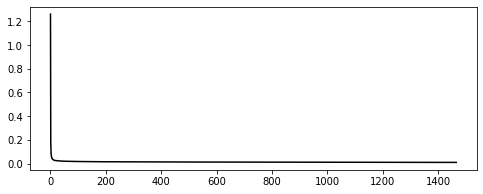

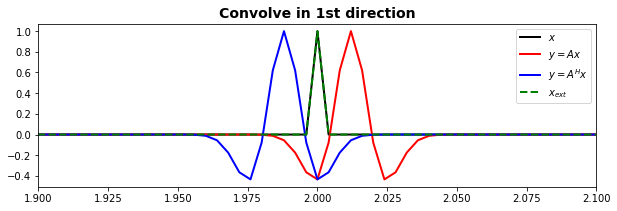

In [50]:
xista, niter, cost = ISTA(Cop, y, niter=10000, eps=0.01, alpha=0.1, returninfo=True)
print(type(xista))
plt.figure(figsize=(8, 3))
plt.plot(cost, 'k')

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(cp.asnumpy(t), cp.asnumpy(x), 'k', lw=2, label=r'$x$')
ax.plot(cp.asnumpy(t), cp.asnumpy(y), 'r', lw=2, label=r'$y=Ax$')
ax.plot(cp.asnumpy(t), cp.asnumpy(y1), 'b', lw=2, label=r'$y=A^Hx$')
ax.plot(cp.asnumpy(t), cp.asnumpy(xista), '--g', lw=2, label=r'$x_{ext}$')
ax.set_title('Convolve in 1st direction', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xlim(1.9,2.1);

Dot test passed, v^T(Opu)=-259.129135 - u^T(Op^Tv)=-259.129135


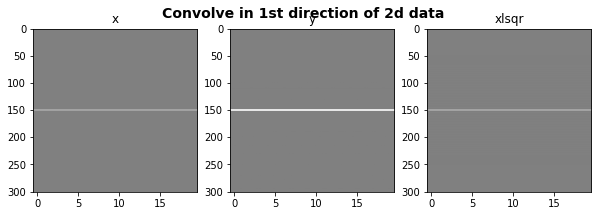

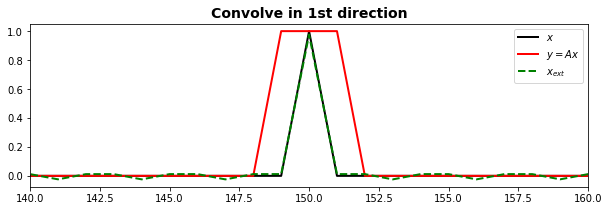

In [21]:
nt = 301
nx = 20
dt = 0.004
t  = cp.arange(nt)*dt
x  = cp.zeros((nt, nx))
x[int(nt/2),:] = 1

h = np.ones(3)
hcenter=1

Cop = Convolve1D(nt*nx, h=h, offset=hcenter, dims=[nt,nx], dir=0, dtype='float32')
dottest(Cop, nt*nx, nt*nx, verb=True, backend='cupy')

y    = Cop*x.flatten()
xcgls = cgls(Cop, y, x0=cp.zeros(nt*nx), damp=0, niter=1000, show=0)[0]

y = y.reshape(nt,nx)
xcgls = xcgls.reshape(nt,nx)

fig, axs = plt.subplots(1,3,figsize=(10,3))
fig.suptitle('Convolve in 1st direction of 2d data',fontsize=14, fontweight='bold')
axs[0].imshow(cp.asnumpy(x), cmap='gray', vmin=-1, vmax=1)
axs[1].imshow(cp.asnumpy(y), cmap='gray', vmin=-1, vmax=1)
axs[2].imshow(cp.asnumpy(xcgls), cmap='gray', vmin=-1, vmax=1)
axs[0].set_title('x'),axs[0].axis('tight')
axs[1].set_title('y'),axs[1].axis('tight')
axs[2].set_title('xlsqr'),axs[2].axis('tight');

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(cp.asnumpy(x)[:, int(nx/2)],'k'      ,lw=2, label=r'$x$')
ax.plot(cp.asnumpy(y)[:, int(nx/2)],'r'      ,lw=2, label=r'$y=Ax$')
ax.plot(cp.asnumpy(xcgls)[:, int(nx/2)],'--g',lw=2, label=r'$x_{ext}$')
ax.set_title('Convolve in 1st direction',fontsize=14, fontweight='bold')
ax.legend();
ax.set_xlim(140,160);

Dot test passed, v^T(Opu)=-463.621958 - u^T(Op^Tv)=-463.621958


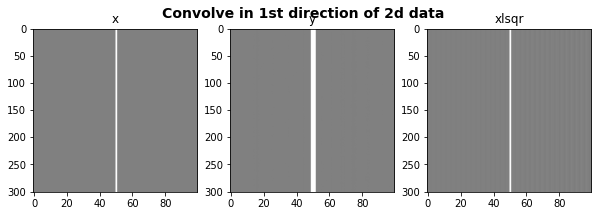

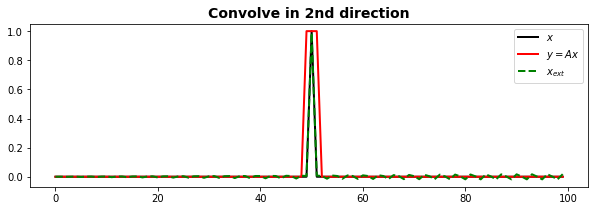

In [22]:
nt = 301
nx = 100
dt = 0.004
t  = cp.arange(nt)*dt
x  = cp.zeros((nt, nx))
x[:, int(nx/2)] = 1

h = np.ones(3)
hcenter=1

Cop = Convolve1D(nt*nx, h=h, offset=hcenter, dims=[nt,nx], dir=-1, dtype='float32')
dottest(Cop, nt*nx, nt*nx, verb=True, backend='cupy')

y = Cop*x.flatten()
xcgls = cgls(Cop, y, x0=cp.zeros(nt*nx), damp=0, niter=1000, show=0)[0]

y = y.reshape(nt,nx)
xcgls = xcgls.reshape(nt,nx)

fig, axs = plt.subplots(1,3,figsize=(10,3))
fig.suptitle('Convolve in 1st direction of 2d data',fontsize=14, fontweight='bold')
axs[0].imshow(cp.asnumpy(x), cmap='gray', vmin=-1, vmax=1)
axs[1].imshow(cp.asnumpy(y), cmap='gray', vmin=-1, vmax=1)
axs[2].imshow(cp.asnumpy(xcgls), cmap='gray', vmin=-1, vmax=1)
axs[0].set_title('x'),axs[0].axis('tight')
axs[1].set_title('y'),axs[1].axis('tight')
axs[2].set_title('xlsqr'),axs[2].axis('tight');

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(cp.asnumpy(x)[int(nt/2)],'k'      ,lw=2, label=r'$x$')
ax.plot(cp.asnumpy(y)[int(nt/2)],'r'      ,lw=2, label=r'$y=Ax$')
ax.plot(cp.asnumpy(xcgls)[int(nt/2)],'--g',lw=2, label=r'$x_{ext}$')
ax.set_title('Convolve in 2nd direction',fontsize=14, fontweight='bold')
ax.legend();

## Preconditioned inversion with smoothing

Dot test passed, v^T(Opu)=8.048900 - u^T(Op^Tv)=8.048900


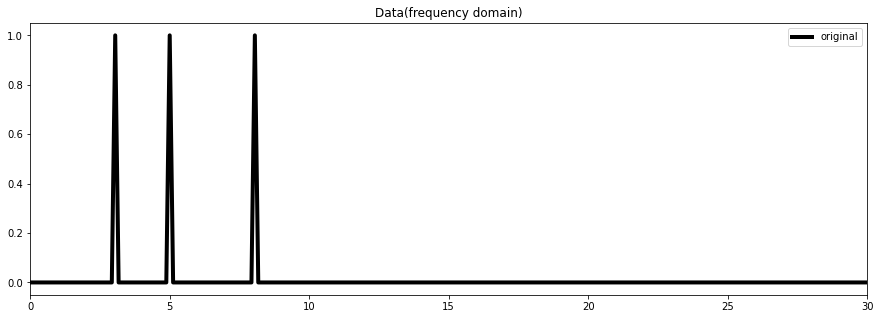

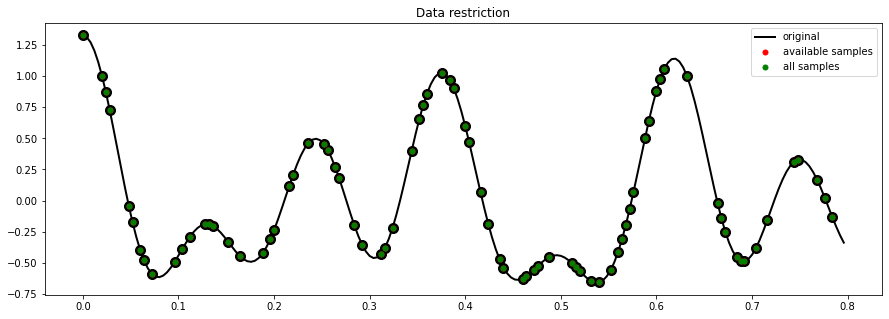

In [23]:
# Signal creation
N=200
dt=0.004
nfft=2**11
t = np.arange(N)*dt
f = np.fft.rfftfreq(nfft, dt)
ifreqs = [ 41, 25, 66]
freqs = f[ifreqs]

X = cp.zeros(nfft//2+1, dtype='complex128')
X[ifreqs] = 1
FFTop = 10*FFT(N, nfft=nfft, real=True)
x = FFTop.H*X

fig = plt.figure(figsize=(15,5))
plt.plot(f, np.abs(cp.asnumpy(X)), 'k', LineWidth=4,   label='original')
plt.xlim(0,30)
plt.legend()
plt.title('Data(frequency domain)');

# subsampling locations
perc_subsampling=0.4
Nsub=int(np.round(N*perc_subsampling))

iava = np.sort(np.random.permutation(np.arange(N))[:Nsub])

# Create restriction operator
Rop = Restriction(N, iava, dtype='float64')
dottest(Rop,Nsub,N, verb=True, backend='cupy')

y     = Rop*x
ymask = Rop.mask(x)

# Visualize data
fig = plt.figure(figsize=(15,5))
plt.plot(t,       cp.asnumpy(x),       'k' , LineWidth=2,   label='original')
plt.plot(t[iava], cp.asnumpy(x)[iava], '.k', MarkerSize=20)
plt.plot(t[iava], cp.asnumpy(y),       '.r', MarkerSize=10, label='available samples')
plt.plot(t,       ymask,   '.g', MarkerSize=10, label='all samples')
plt.legend()
plt.title('Data restriction');

CGLS
-----------------------------------------------------------
The Operator Op has 80 rows and 200 cols
damp = 8.000000e-02	tol = 1.000000e-04	niter = 20
-----------------------------------------------------------------
    Itn           x[0]              r2norm
     1         5.8280e-01         6.9443e-01
     2         9.5438e-01         4.7416e-01
     3         1.1939e+00         4.7632e-01
     4         1.4812e+00         4.8465e-01
     5         1.6871e+00         4.9355e-01
     6         1.9583e+00         5.0669e-01
     7         2.0866e+00         5.1450e-01
     8         2.1619e+00         5.2182e-01
     9         2.1787e+00         5.2650e-01
    10         2.1750e+00         5.2858e-01
    11         2.1625e+00         5.3038e-01
    12         2.1358e+00         5.3257e-01

Iterations = 12        Total time (s) = 0.30
-----------------------------------------------------------------

lsqr reason for termination= 1
lsqr number of iterations= 12
lsqr residual norm of

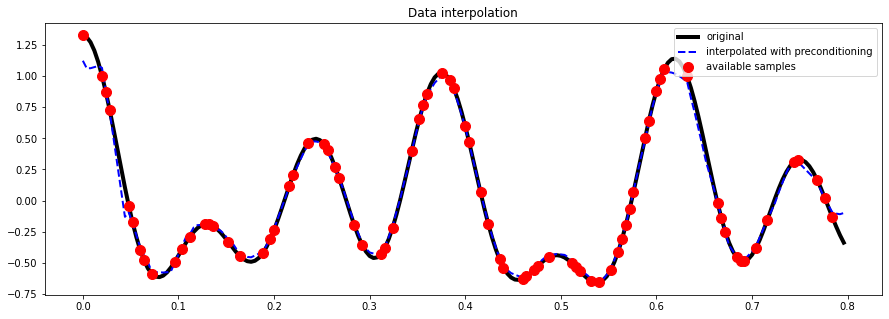

In [24]:
# Create preconditioner
Sop  = Smoothing1D(nsmooth=11, dims=[N], dtype='float64')

# Invert for interpolated signal
xprec, istop, itn, r1norm, r2norm = \
    PreconditionedInversion(Rop, Sop, y, returninfo=True, **dict(damp=8e-2, niter=20, show=1))

print('lsqr reason for termination=', istop)
print('lsqr number of iterations=', itn)
print('lsqr residual norm of iterations=', r1norm)
print('lsqr regularized residual norm=', r2norm)

fig = plt.figure(figsize=(15,5))
plt.plot(t,       cp.asnumpy(x),              'k'   , LineWidth=4,   label='original')
plt.plot(t,       cp.asnumpy(xprec),  '--b' , LineWidth=2,   label='interpolated with preconditioning')
plt.plot(t[iava], cp.asnumpy(y),              '.r'  , MarkerSize=20, label='available samples')
plt.legend()
plt.title('Data interpolation');